# Fed Rate Decision Based on Quant Econ Data

In [39]:
%reload_ext autoreload
%autoreload
%matplotlib inline

In [40]:
from fastai.tabular import *

Tabular data should be in a Pandas `DataFrame`.

In [41]:
path = Path('fedecondata')

In [42]:
path.ls();

In [196]:
df = pd.read_csv(path/'Market Model - Sheet1.csv')

In [197]:
df.head()

,date,1_dollarindex,1_2yearmaturity,1_aaacorpbondto10year,1_policyu,1_ltyield,1_vix,1_gold,1_baacorptotreas,1_90dayeurodollar,...,jp_manufacturing,jp_shortrates,jp_10yr,jp_servicespmi,jp_manufacturingpmi,euro_servicespmi,euro_manufacturingpmi,decision,recession12,recession24
0,1/1/92,74.4082,4.96,1.17,165.447742,7.03,17.683182,354.10,1.90,4.13,...,-3.8,4.50,5.449,NaN,NaN,NaN,NaN,lower,no,no
1,2/1/92,75.6435,5.21,0.95,169.711724,7.34,17.477368,353.10,1.90,4.11,...,-4.5,4.50,5.578,NaN,NaN,NaN,NaN,lower,no,no
2,3/1/92,77.3368,5.69,0.81,125.659032,7.54,17.520455,341.70,1.70,4.32,...,-5.4,4.50,5.531,NaN,NaN,NaN,NaN,lower,no,no
3,4/1/92,77.4242,5.34,0.85,98.949000,7.48,16.562857,336.35,1.63,4.13,...,-5.8,3.75,5.710,NaN,NaN,NaN,NaN,lower,no,no
4,5/1/92,77.0866,5.23,0.89,96.913548,7.39,15.077000,337.50,1.77,3.90,...,-9.1,3.75,5.739,NaN,NaN,NaN,NaN,hold,no,no


In [163]:
# testrow = testdf.iloc[0]
# learn.predict(testrow)

### Classification

In [198]:
# predict decision
dep_var = '1_gold'
cat_names = ['date']
procs = [FillMissing, Categorify, Normalize]

In [199]:
cont_names = ['1_dollarindex',
 '1_2yearmaturity',
 '1_aaacorpbondto10year',
 '1_policyu',
 '1_ltyield',
 '1_vix',
#  '1_gold',
 '1_baacorptotreas',
 '1_90dayeurodollar',
 '1_spreturn',
 '1_libor',
 '1_eurusd',
 '1_eurgovtbondyields',
 '1_tenyearthreemonth',
 '1_tedspread',
 '1_nyfedrprob',
 '1_recessionprob',
 '2_gdpgrowth',
 '2_gdpgrowthyoy',
 '3_employment',
 '3_unemployment',
 '3_longtermunemployment',
 '3_participationrate',
 '3_employmenttopopulationrate',
 '3_parttimeworkers',
 '3_joblessclaims',
 '3_govtpayrolls',
 '3_nonfarmprivatepayrolls',
 '3_manufacturingpayrolls',
 '3_joboffers',
 '3_wages',
 '3_wagegrowth',
 '3_wagesinmanufacturing',
 '3_avghourlyearnings',
 '3_avgweeklyhours',
 '3_challengerjobcuts',
 '3_jobvacancies',
 '3_youthunemployment',
 '4_inflation',
 '4_inflationexpectations',
 '4_cpi',
 '4_coreinflationrate',
 '4_producerpricechanges',
 '4_exportprices',
 '4_importprices',
 '4_foodinflation',
 '4_corepceindex',
 '4_coreproduceprices',
 '4_cpihousingutilities',
 '4_cpitransportation',
 '4_pcepriceindex',
 '5_fedfundsrate',
 '5_mo',
 '5_m1',
 '5_m2',
 '5_fxreserves',
 '5_loanstoprivatesector',
 '5_foreignbondinvestment',
 '5_commercialloans',
 '6_balanceoftrade',
 '6_exports',
 '6_imports',
 '6_capital flows',
 '6_longtermticflows',
 '6_crudeoilproduction',
 '6_crudeoilprices',
 '6_goodstradebalance',
 '6_tourismrevenues',
 '6_touristarrivals',
 '7_monthstopotuselection',
 '8_industrialproduction',
 '8_manufacturingproduction',
 '8_capacityutilization',
 '8_us_durablegoods',
 '8_durablegoodsexdefense',
 '8_durablegoodsextransportation',
 '8_factoryordersextransportation',
 '8_factoryorders',
 '8_neworders',
 '8_businessinventories',
 '8_wholesaleinventories',
 '8_nfibbusinessoptimismindex',
 '8_chicagofedactivityindex',
 '8_dallasfedmanufacturingindex',
 '8_nyempiremanfacturingindex',
 '8_phillyfedindex',
 '8_richmondfedindex',
 '8_autoassemblies',
 '8_lightvehiclesales',
 '8_leadingindex',
 '8_kansascityfedindex',
 '8_miningproduction',
 '8_steelproduction',
 '8_uspmi',
 '8_ism',
 '8_capitalgoodsshipments',
 '8_capitalgoodsorders',
 '9_consumersentiment',
 '9_advanceretailsales',
 '9_retailsalesmom',
 '9_retailsalesyoy',
 '9_retailsalesexautos',
 '9_disppersonalincome',
 '9_personalspending',
 '9_personalincome',
 '9_personalsavings',
 '9_consumercredit',
 '9_privatesectorcredit',
 '9_banklendingrate',
 '9_ibdtippeconomicoptimismindex',
 '9_chainstoresales',
 '9_gasolineprices',
 'caseindex',
 '10_buildingpermits',
 '10_housingstartssingle',
 '10_housingstartsmulti',
 '10_newhomesales',
 '10_pendinghomesales',
 '10_existinghomesales',
 '10_constructionnonres',
 '10_housingindex',
 '10_nahbhousingindex',
 '11_oecdbizconditions',
 'ger_ltyields',
 'ger_3month',
 'ger_unemp',
 'ger_industrialprod',
 'ger_neworders',
 'ger_servicespmi',
 'ger_manufacturingpmi',
 'ch_industrialprod',
 'ch_electric',
 'ch_consumerconf',
 'ch_compositepmi',
 'ch_caixinpmi',
 'jp_industrialprod',
 'jp_neworders',
 'jp_unemploymentrate',
 'jp_manufacturing',
 'jp_shortrates',
 'jp_10yr',
 'jp_servicespmi',
 'jp_manufacturingpmi',
 'euro_servicespmi',
 'euro_manufacturingpmi',]

In [200]:
valid_idx = range(len(df)-90, len(df)-5)

In [201]:
valid_idx

range(240, 325)

In [202]:
test = TabularList.from_df(df.iloc[326:330].copy(), path=path, cat_names=cat_names, cont_names=cont_names)

In [168]:
test;

In [226]:
data = (TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(valid_idx)
                           .label_from_df(cols=dep_var, label_cls=FloatList, log=True)
                           .add_test(test)
                           .databunch())

In [204]:
data.show_batch(rows=5)

date,3_joboffers_na,3_avghourlyearnings_na,3_avgweeklyhours_na,3_challengerjobcuts_na,3_jobvacancies_na,4_coreproduceprices_na,6_capital flows_na,6_longtermticflows_na,6_crudeoilproduction_na,6_tourismrevenues_na,6_touristarrivals_na,8_us_durablegoods_na,8_durablegoodsexdefense_na,8_durablegoodsextransportation_na,8_factoryordersextransportation_na,8_neworders_na,8_businessinventories_na,8_wholesaleinventories_na,8_dallasfedmanufacturingindex_na,8_nyempiremanfacturingindex_na,8_richmondfedindex_na,8_kansascityfedindex_na,9_retailsalesmom_na,9_retailsalesyoy_na,9_retailsalesexautos_na,9_ibdtippeconomicoptimismindex_na,9_chainstoresales_na,10_pendinghomesales_na,10_housingindex_na,ger_servicespmi_na,ger_manufacturingpmi_na,ch_compositepmi_na,ch_caixinpmi_na,jp_servicespmi_na,jp_manufacturingpmi_na,euro_servicespmi_na,euro_manufacturingpmi_na,1_dollarindex,1_2yearmaturity,1_aaacorpbondto10year,1_policyu,1_ltyield,1_vix,1_baacorptotreas,1_90dayeurodollar,1_spreturn,1_libor,1_eurusd,1_eurgovtbondyields,1_tenyearthreemonth,1_tedspread,1_nyfedrprob,1_recessionprob,2_gdpgrowth,2_gdpgrowthyoy,3_employment,3_unemployment,3_longtermunemployment,3_participationrate,3_employmenttopopulationrate,3_parttimeworkers,3_joblessclaims,3_govtpayrolls,3_nonfarmprivatepayrolls,3_manufacturingpayrolls,3_joboffers,3_wages,3_wagegrowth,3_wagesinmanufacturing,3_avghourlyearnings,3_avgweeklyhours,3_challengerjobcuts,3_jobvacancies,3_youthunemployment,4_inflation,4_inflationexpectations,4_cpi,4_coreinflationrate,4_producerpricechanges,4_exportprices,4_importprices,4_foodinflation,4_corepceindex,4_coreproduceprices,4_cpihousingutilities,4_cpitransportation,4_pcepriceindex,5_fedfundsrate,5_mo,5_m1,5_m2,5_fxreserves,5_loanstoprivatesector,5_foreignbondinvestment,5_commercialloans,6_balanceoftrade,6_exports,6_imports,6_capital flows,6_longtermticflows,6_crudeoilproduction,6_crudeoilprices,6_goodstradebalance,6_tourismrevenues,6_touristarrivals,7_monthstopotuselection,8_industrialproduction,8_manufacturingproduction,8_capacityutilization,8_us_durablegoods,8_durablegoodsexdefense,8_durablegoodsextransportation,8_factoryordersextransportation,8_factoryorders,8_neworders,8_businessinventories,8_wholesaleinventories,8_nfibbusinessoptimismindex,8_chicagofedactivityindex,8_dallasfedmanufacturingindex,8_nyempiremanfacturingindex,8_phillyfedindex,8_richmondfedindex,8_autoassemblies,8_lightvehiclesales,8_leadingindex,8_kansascityfedindex,8_miningproduction,8_steelproduction,8_uspmi,8_ism,8_capitalgoodsshipments,8_capitalgoodsorders,9_consumersentiment,9_advanceretailsales,9_retailsalesmom,9_retailsalesyoy,9_retailsalesexautos,9_disppersonalincome,9_personalspending,9_personalincome,9_personalsavings,9_consumercredit,9_privatesectorcredit,9_banklendingrate,9_ibdtippeconomicoptimismindex,9_chainstoresales,9_gasolineprices,caseindex,10_buildingpermits,10_housingstartssingle,10_housingstartsmulti,10_newhomesales,10_pendinghomesales,10_existinghomesales,10_constructionnonres,10_housingindex,10_nahbhousingindex,11_oecdbizconditions,ger_ltyields,ger_3month,ger_unemp,ger_industrialprod,ger_neworders,ger_servicespmi,ger_manufacturingpmi,ch_industrialprod,ch_electric,ch_consumerconf,ch_compositepmi,ch_caixinpmi,jp_industrialprod,jp_neworders,jp_unemploymentrate,jp_manufacturing,jp_shortrates,jp_10yr,jp_servicespmi,jp_manufacturingpmi,euro_servicespmi,euro_manufacturingpmi,target
8/1/10,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,-0.2642,-1.6934,0.8647,1.3343,-1.6678,0.5203,0.8227,-1.5727,0.0266,-1.6144,0.8577,-0.9738,0.4408,-0.8152,-0.8321,-0.3281,0.1138,0.2803,0.2934,2.1433,2.5952,-1.6432,-2.1338,2.0779,1.4798,-2.8435,0.2478,0.2444,-0.9941,1.3972,-0.4736,1.3296,-1.2326,-0.6534,-0.8793,-0.9206,2.0174,1.3256,-0.4442,1.2866,-2.1958,0.4246,1.5058,1.2873,-1.2898,1.3271,-1.0819,1.2154,1.2932,1.3306,-1.5437,1.656

In [205]:
import math
import torch
from torch.optim.optimizer import Optimizer, required

class RAdam(Optimizer):

    def __init__(self, params, lr=1e-3, betas=(0.9, 0.999), eps=1e-8, weight_decay=0):
        defaults = dict(lr=lr, betas=betas, eps=eps, weight_decay=weight_decay)
        self.buffer = [[None, None, None] for ind in range(10)]
        super(RAdam, self).__init__(params, defaults)

    def __setstate__(self, state):
        super(RAdam, self).__setstate__(state)

    def step(self, closure=None):

        loss = None
        if closure is not None:
            loss = closure()

        for group in self.param_groups:

            for p in group['params']:
                if p.grad is None:
                    continue
                grad = p.grad.data.float()
                if grad.is_sparse:
                    raise RuntimeError('RAdam does not support sparse gradients')

                p_data_fp32 = p.data.float()

                state = self.state[p]

                if len(state) == 0:
                    state['step'] = 0
                    state['exp_avg'] = torch.zeros_like(p_data_fp32)
                    state['exp_avg_sq'] = torch.zeros_like(p_data_fp32)
                else:
                    state['exp_avg'] = state['exp_avg'].type_as(p_data_fp32)
                    state['exp_avg_sq'] = state['exp_avg_sq'].type_as(p_data_fp32)

                exp_avg, exp_avg_sq = state['exp_avg'], state['exp_avg_sq']
                beta1, beta2 = group['betas']

                exp_avg_sq.mul_(beta2).addcmul_(1 - beta2, grad, grad)
                exp_avg.mul_(beta1).add_(1 - beta1, grad)

                state['step'] += 1
                buffered = self.buffer[int(state['step'] % 10)]
                if state['step'] == buffered[0]:
                    N_sma, step_size = buffered[1], buffered[2]
                else:
                    buffered[0] = state['step']
                    beta2_t = beta2 ** state['step']
                    N_sma_max = 2 / (1 - beta2) - 1
                    N_sma = N_sma_max - 2 * state['step'] * beta2_t / (1 - beta2_t)
                    buffered[1] = N_sma
                    if N_sma > 5:
                        step_size = group['lr'] * math.sqrt((1 - beta2_t) * (N_sma - 4) / (N_sma_max - 4) * (N_sma - 2) / N_sma * N_sma_max / (N_sma_max - 2)) / (1 - beta1 ** state['step'])
                    else:
                        step_size = group['lr'] / (1 - beta1 ** state['step'])
                    buffered[2] = step_size

                if group['weight_decay'] != 0:
                    p_data_fp32.add_(-group['weight_decay'] * group['lr'], p_data_fp32)

                if N_sma > 5:                    
                    denom = exp_avg_sq.sqrt().add_(group['eps'])
                    p_data_fp32.addcdiv_(-step_size, exp_avg, denom)
                else:
                    p_data_fp32.add_(-step_size, exp_avg)

                p.data.copy_(p_data_fp32)

        return loss

class PlainRAdam(Optimizer):

    def __init__(self, params, lr=1e-3, betas=(0.9, 0.999), eps=1e-8, weight_decay=0):
        defaults = dict(lr=lr, betas=betas, eps=eps, weight_decay=weight_decay)

        super(RAdam, self).__init__(params, defaults)

    def __setstate__(self, state):
        super(RAdam, self).__setstate__(state)

    def step(self, closure=None):

        loss = None
        if closure is not None:
            loss = closure()

        for group in self.param_groups:

            for p in group['params']:
                if p.grad is None:
                    continue
                grad = p.grad.data.float()
                if grad.is_sparse:
                    raise RuntimeError('RAdam does not support sparse gradients')

                p_data_fp32 = p.data.float()

                state = self.state[p]

                if len(state) == 0:
                    state['step'] = 0
                    state['exp_avg'] = torch.zeros_like(p_data_fp32)
                    state['exp_avg_sq'] = torch.zeros_like(p_data_fp32)
                else:
                    state['exp_avg'] = state['exp_avg'].type_as(p_data_fp32)
                    state['exp_avg_sq'] = state['exp_avg_sq'].type_as(p_data_fp32)

                exp_avg, exp_avg_sq = state['exp_avg'], state['exp_avg_sq']
                beta1, beta2 = group['betas']

                exp_avg_sq.mul_(beta2).addcmul_(1 - beta2, grad, grad)
                exp_avg.mul_(beta1).add_(1 - beta1, grad)

                state['step'] += 1
                beta2_t = beta2 ** state['step']
                N_sma_max = 2 / (1 - beta2) - 1
                N_sma = N_sma_max - 2 * state['step'] * beta2_t / (1 - beta2_t)

                if group['weight_decay'] != 0:
                    p_data_fp32.add_(-group['weight_decay'] * group['lr'], p_data_fp32)

                if N_sma > 5:                    
                    step_size = group['lr'] * math.sqrt((1 - beta2_t) * (N_sma - 4) / (N_sma_max - 4) * (N_sma - 2) / N_sma * N_sma_max / (N_sma_max - 2)) / (1 - beta1 ** state['step'])
                    denom = exp_avg_sq.sqrt().add_(group['eps'])
                    p_data_fp32.addcdiv_(-step_size, exp_avg, denom)
                else:
                    step_size = group['lr'] / (1 - beta1 ** state['step'])
                    p_data_fp32.add_(-step_size, exp_avg)

                p.data.copy_(p_data_fp32)

        return loss


class AdamW(Optimizer):

    def __init__(self, params, lr=1e-3, betas=(0.9, 0.999), eps=1e-8, weight_decay=0, warmup = 0):
        defaults = dict(lr=lr, betas=betas, eps=eps,
                        weight_decay=weight_decay, amsgrad=amsgrad, use_variance=True, warmup = warmup)
        super(AdamW, self).__init__(params, defaults)

    def __setstate__(self, state):
        super(AdamW, self).__setstate__(state)

    def step(self, closure=None):
        loss = None
        if closure is not None:
            loss = closure()

        for group in self.param_groups:

            for p in group['params']:
                if p.grad is None:
                    continue
                grad = p.grad.data.float()
                if grad.is_sparse:
                    raise RuntimeError('Adam does not support sparse gradients, please consider SparseAdam instead')

                p_data_fp32 = p.data.float()

                state = self.state[p]

                if len(state) == 0:
                    state['step'] = 0
                    state['exp_avg'] = torch.zeros_like(p_data_fp32)
                    state['exp_avg_sq'] = torch.zeros_like(p_data_fp32)
                else:
                    state['exp_avg'] = state['exp_avg'].type_as(p_data_fp32)
                    state['exp_avg_sq'] = state['exp_avg_sq'].type_as(p_data_fp32)

                exp_avg, exp_avg_sq = state['exp_avg'], state['exp_avg_sq']
                beta1, beta2 = group['betas']

                state['step'] += 1

                exp_avg_sq.mul_(beta2).addcmul_(1 - beta2, grad, grad)
                exp_avg.mul_(beta1).add_(1 - beta1, grad)

                denom = exp_avg_sq.sqrt().add_(group['eps'])
                bias_correction1 = 1 - beta1 ** state['step']
                bias_correction2 = 1 - beta2 ** state['step']
                
                if group['warmup'] > state['step']:
                    scheduled_lr = 1e-8 + state['step'] * group['lr'] / group['warmup']
                else:
                    scheduled_lr = group['lr']

                step_size = group['lr'] * math.sqrt(bias_correction2) / bias_correction1
                
                if group['weight_decay'] != 0:
                    p_data_fp32.add_(-group['weight_decay'] * scheduled_lr, p_data_fp32)

                p_data_fp32.addcdiv_(-step_size, exp_avg, denom)

                p.data.copy_(p_data_fp32)

        return loss

In [236]:
learn = tabular_learner(data, layers=[600,200], metrics=exp_rmspe, opt_func=RAdam, emb_drop=0.2)

In [228]:
learn.model;

In [237]:
learn.fit_one_cycle(5, 1e-2, wd=0.2)

epoch,train_loss,valid_loss,exp_rmspe,time
0,38.174480,49.768597,0.999129,00:00
1,36.859821,45.927437,0.998850,00:00
2,36.050949,45.122646,0.998779,00:00
3,35.425087,44.451862,0.998717,00:00
4,35.061668,43.799080,0.998652,00:00


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


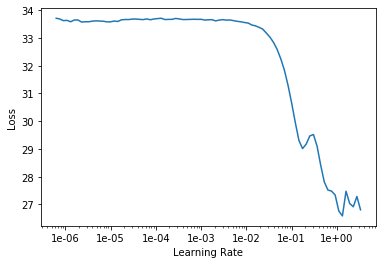

In [209]:
learn.lr_find()
learn.recorder.plot()

In [244]:
learn.fit_one_cycle(10, slice(1e-1), wd=0.1)

epoch,train_loss,valid_loss,exp_rmspe,time
0,0.111148,0.181873,0.571809,00:00
1,0.102463,0.560538,0.515998,00:00
2,0.920189,103.702164,494763.437500,00:00
3,1.362825,71.196518,52927.734375,00:00
4,1.227019,10.785137,41.175243,00:00
5,1.083313,4.976323,10.107600,00:00
6,0.927634,1.376120,2.500937,00:00
7,0.821977,0.166453,0.595351,00:00
8,0.725555,0.064814,0.298252,00:00
9,0.646322,0.094749,0.287957,00:00


In [247]:
testrow = test[3]

In [248]:
learn.predict(testrow)

(FloatItem [13534.227], tensor([13534.2266]), tensor([13534.2266]))

## Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')

In [83]:
model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [84]:
import numpy as np

In [85]:
features = pd.read_csv(path/'Market Model - Sheet1.csv')

In [86]:
features2 = features.drop(['date'], axis=1)

In [96]:
features2 = features2.drop(['recession24'], axis=1)

In [98]:
features2 = features2.drop(['decision'], axis=1)

In [99]:
features2.head()

,1_dollarindex,1_2yearmaturity,1_aaacorpbondto10year,1_policyu,1_ltyield,1_vix,1_gold,1_baacorptotreas,1_90dayeurodollar,1_spreturn,...,jp_neworders,jp_unemploymentrate,jp_manufacturing,jp_shortrates,jp_10yr,jp_servicespmi,jp_manufacturingpmi,euro_servicespmi,euro_manufacturingpmi,recession12
0,74.4082,4.96,1.17,165.447742,7.03,17.683182,354.10,1.90,4.13,0.070963,...,1300.22,2.1,-3.8,4.50,5.449,NaN,NaN,NaN,NaN,no
1,75.6435,5.21,0.95,169.711724,7.34,17.477368,353.10,1.90,4.11,-0.008460,...,1301.16,2.0,-4.5,4.50,5.578,NaN,NaN,NaN,NaN,no
2,77.3368,5.69,0.81,125.659032,7.54,17.520455,341.70,1.70,4.32,-0.012604,...,1291.57,2.1,-5.4,4.50,5.531,NaN,NaN,NaN,NaN,no
3,77.4242,5.34,0.85,98.949000,7.48,16.562857,336.35,1.63,4.13,0.000123,...,1323.94,2.1,-5.8,3.75,5.710,NaN,NaN,NaN,NaN,no
4,77.0866,5.23,0.89,96.913548,7.39,15.077000,337.50,1.77,3.90,0.018164,...,1161.37,2.1,-9.1,3.75,5.739,NaN,NaN,NaN,NaN,no


In [100]:
labels = np.array(features2['recession12'])

In [101]:
features= features2.drop('recession12', axis = 1)

In [102]:
feature_list = list(features.columns)

In [103]:
features = np.array(features)

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.003, random_state = 42)

In [106]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (329, 145)
Training Labels Shape: (329,)
Testing Features Shape: (1, 145)
Testing Labels Shape: (1,)


In [107]:
model.fit(train_features,train_labels)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [68]:
predictions = model.predict(test_features)

In [69]:
predictions

array(['hold'], dtype=object)

In [70]:
test_labels

array(['lower'], dtype=object)

In [71]:
predictions.shape

(1,)

In [72]:
test_labels.shape

(1,)

In [73]:
from sklearn.metrics import accuracy_score

In [74]:
acc = accuracy_score(test_labels, predictions)

In [75]:
acc

0.0

In [55]:
test = pd.read_csv(path/'new1992rftest.csv')

In [ ]:
model.